In [35]:
import pandas as pd
import numpy as np
from datetime import datetime

#Graficoas
import seaborn as sns
import matplotlib.pyplot as plt

!pip install openpyxl

El dataset puede ser obtenido desde kaggle en al siguiente ruta:
Link: https://www.kaggle.com/datasets/archit9406/customer-transaction-dataset



In [36]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions')
df.columns = df.iloc[0]
# Dejamos transaction_id como index
df.drop(df.index[0],inplace=True, axis = 0)

# Filtramos aquellos registros en estado 'Approved'
df = df[df['order_status'] == 'Approved']
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19821 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           19821 non-null  object
 1   product_id               19821 non-null  object
 2   customer_id              19821 non-null  object
 3   transaction_date         19821 non-null  object
 4   online_order             19467 non-null  object
 5   order_status             19821 non-null  object
 6   brand                    19625 non-null  object
 7   product_line             19625 non-null  object
 8   product_class            19625 non-null  object
 9   product_size             19625 non-null  object
 10  list_price               19821 non-null  object
 11  standard_cost            19625 non-null  object
 12  product_first_sold_date  19625 non-null  object
dtypes: object(13)
memory usage: 2.1+ MB


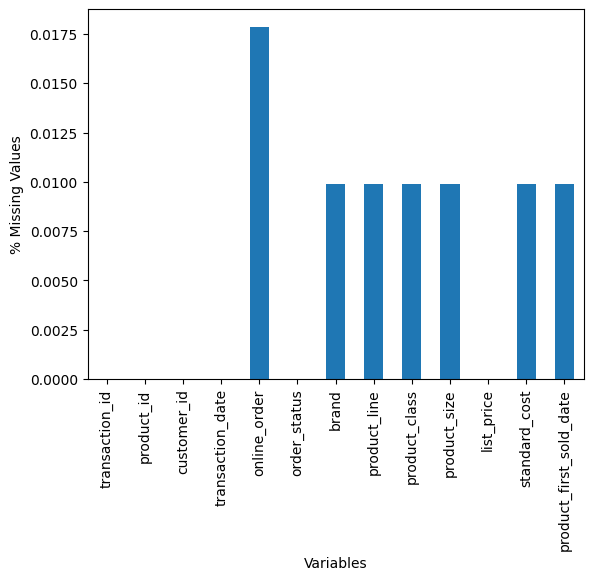

In [38]:
# Revisando Valores Nulos.
df.isnull().mean().plot(kind='bar',xlabel="Variables", ylabel='% Missing Values') 
df = df[df['order_status'] == 'Approved']

In [39]:

## Dejar en formato fecha.
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format= "%d/%m/%y")

# Formato float para list_price = valor de la compra.
df['list_price'] = df['list_price'].astype('float')

df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [40]:
#Creramos una copia con columnas que utilizaremos.
df2 = df[['customer_id','transaction_date','transaction_id','list_price']].copy(deep=True)
df2

,customer_id,transaction_date,transaction_id,list_price
1,2950,2017-02-25,1,71.49
2,3120,2017-05-21,2,2091.47
3,402,2017-10-16,3,1793.43
4,3135,2017-08-31,4,1198.46
5,787,2017-10-01,5,1765.30
...,...,...,...,...
19996,1018,2017-06-24,19996,2005.66
19997,127,2017-11-09,19997,416.98
19998,2284,2017-04-14,19998,1636.90
19999,2764,2017-07-03,19999,227.88


In [42]:
# Definimos el periodo de la compra. Como es el cohorte por mes: creamos con año mes en formato Y-m
#Periodo = Mes de la compra
df2['periodo'] = df.transaction_date.apply(lambda x: x.strftime("%Y-%m"))
df2

,customer_id,transaction_date,transaction_id,list_price,periodo
1,2950,2017-02-25,1,71.49,2017-02
2,3120,2017-05-21,2,2091.47,2017-05
3,402,2017-10-16,3,1793.43,2017-10
4,3135,2017-08-31,4,1198.46,2017-08
5,787,2017-10-01,5,1765.30,2017-10
...,...,...,...,...,...
19996,1018,2017-06-24,19996,2005.66,2017-06
19997,127,2017-11-09,19997,416.98,2017-11
19998,2284,2017-04-14,19998,1636.90,2017-04
19999,2764,2017-07-03,19999,227.88,2017-07


In [43]:
# Dejamos el customer_id como indice y agrupamos por la fecha de la compra.
df2.set_index('customer_id', inplace=True)
# Agrupamos por la fecha de la compra y obtenemos el minimo(Primer) periodo de compra. que sera el grupo de cohorte respectivo.
df2['grupo_Corte']= df2.groupby(level=0)['transaction_date'].min().apply(lambda x: x.strftime("%Y-%m"))
# Reiniciamos el indice.
df2.reset_index(inplace=True)
df2

,customer_id,transaction_date,transaction_id,list_price,periodo,grupo_Corte
0,2950,2017-02-25,1,71.49,2017-02,2017-02
1,3120,2017-05-21,2,2091.47,2017-05,2017-01
2,402,2017-10-16,3,1793.43,2017-10,2017-01
3,3135,2017-08-31,4,1198.46,2017-08,2017-02
4,787,2017-10-01,5,1765.30,2017-10,2017-01
...,...,...,...,...,...,...
19816,1018,2017-06-24,19996,2005.66,2017-06,2017-01
19817,127,2017-11-09,19997,416.98,2017-11,2017-01
19818,2284,2017-04-14,19998,1636.90,2017-04,2017-04
19819,2764,2017-07-03,19999,227.88,2017-07,2017-02


periodo
2017-10    1756
2017-08    1733
2017-07    1703
2017-01    1668
2017-05    1667
2017-11    1649
2017-03    1644
2017-04    1638
2017-12    1625
2017-02    1618
2017-06    1562
2017-09    1558
Name: count, dtype: int64


<Axes: xlabel='Variables', ylabel='% Missing Values'>

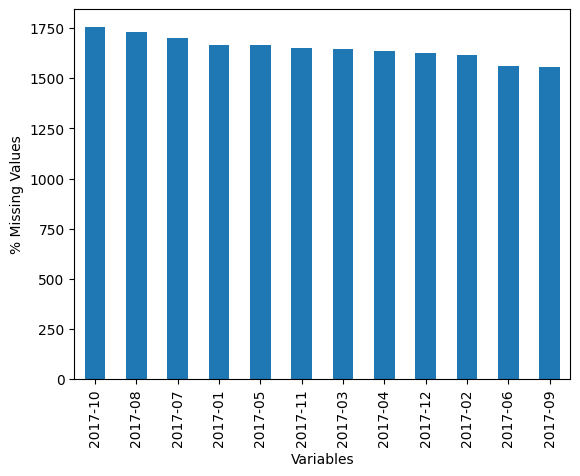

In [45]:
# Deben ser los ultimos 18 mneses. Revisamos los periodos.
print(df2['periodo'].value_counts())

df2['periodo'].value_counts().plot(kind='bar',xlabel="Variables", ylabel='% Missing Values') 

In [47]:
#Agrupamos y contamos para obtener totales por grupo de cohorte y periodos y sumamos los precios para obetner total.

Grupo_corte = df2.groupby(['grupo_Corte','periodo'])
Grupo_corte

cohortes = Grupo_corte.agg({'customer_id': pd.Series.nunique,
                            'transaction_id': pd.Series.nunique,
                            'list_price':sum })

cohortes

0                    customer_id  transaction_id  list_price
grupo_Corte periodo                                         
2017-01     2017-01         1347            1668  1846812.04
            2017-02          483             610   695838.85
            2017-03          505             628   701788.37
            2017-04          499             617   686026.96
            2017-05          492             639   713139.39
...                          ...             ...         ...
2017-10     2017-11            6               9     9250.42
            2017-12            8               9    10120.50
2017-11     2017-11           13              16    16381.24
            2017-12            5               6     4252.95
2017-12     2017-12            4               6     5065.92

[78 rows x 3 columns]

In [48]:
# Creamos una serie con el tamaño total de cada grupo para sacar los porcentajes.
grupo_Corte_size = cohortes['customer_id'].groupby(level=0).first()
grupo_Corte_size.head()

grupo_Corte
2017-01    1347
2017-02     800
2017-03     484
2017-04     337
2017-05     213
Name: customer_id, dtype: int64

In [49]:
# Creamos la matriz de retencion. #Hacemos pivote y pasamos a columnas.
m_retencion = cohortes['customer_id'].unstack(0)
m_retencion.head()

grupo_Corte,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
periodo,,,,,,,,,,,,
2017-01,1347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,483.0,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,505.0,322.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04,499.0,297.0,167.0,337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05,492.0,311.0,172.0,110.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#Extraer la variable clientes
m_retencion_porcentaje = cohortes['customer_id'].unstack(0).divide(grupo_Corte_size, axis=1)
m_retencion_porcentaje

grupo_Corte,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
periodo,,,,,,,,,,,,
2017-01,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,0.358575,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,0.374907,0.40250,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04,0.370453,0.37125,0.345041,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05,0.365256,0.38875,0.355372,0.326409,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06,0.352635,0.35375,0.338843,0.359050,0.403756,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
2017-07,0.380846,0.37125,0.371901,0.451039,0.389671,0.365854,1.000000,NaN,NaN,NaN,NaN,NaN
2017-08,0.389013,0.38250,0.380165,0.421365,0.413146,0.357724,0.337662,1.000000,NaN,NaN,NaN,NaN
2017-09,0.363029,0.35125,0.357438,0.350148,0.342723,0.382114,0.337662,0.352941,1.000000,NaN,NaN,NaN


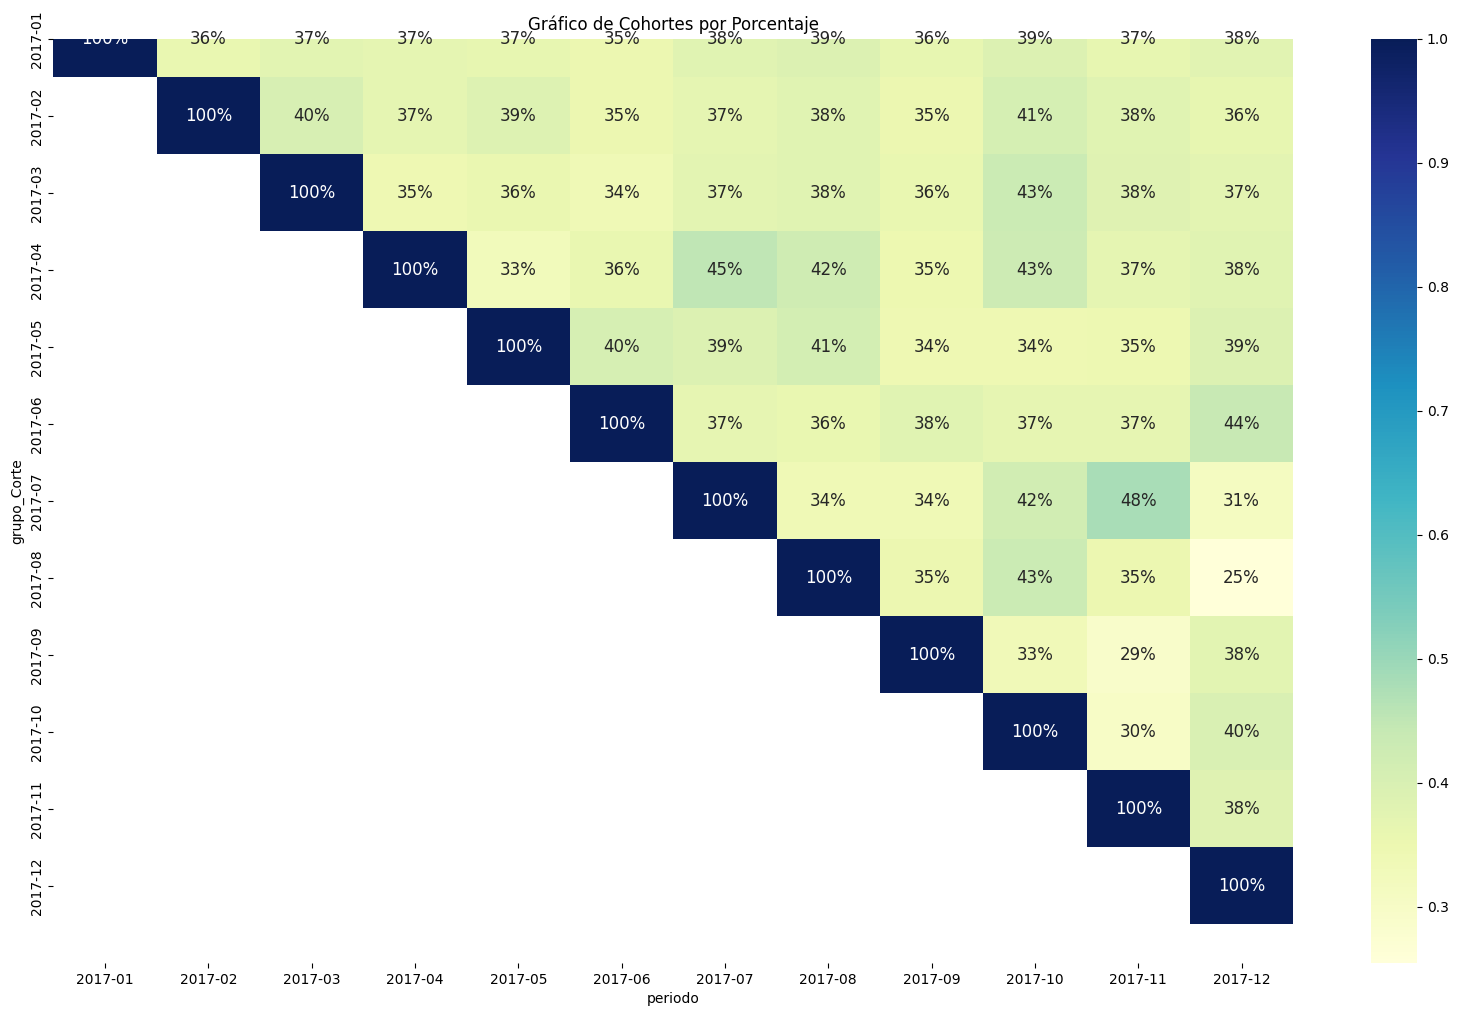

In [51]:
matriz_Retencion_Porcentajes = m_retencion_porcentaje.T
plt.figure(figsize=(20,12)) # tamaño del grafico
plt.title("Gráfico de Cohortes por Porcentaje")
sns.heatmap(data= matriz_Retencion_Porcentajes,
            annot=True,
            fmt=".0%", # lo pasa de decimales.
            annot_kws={'size':12}, # tamaño de letra
            cbar=True,
            cmap='YlGnBu'
            )

b,t = plt.ylim() # Descibre lops valores de botton y top
b += 0.5 # le suma a la parte inferior.
t += 0.5 # le suma a la parte superior.
plt.ylim(b,t)
plt.show()

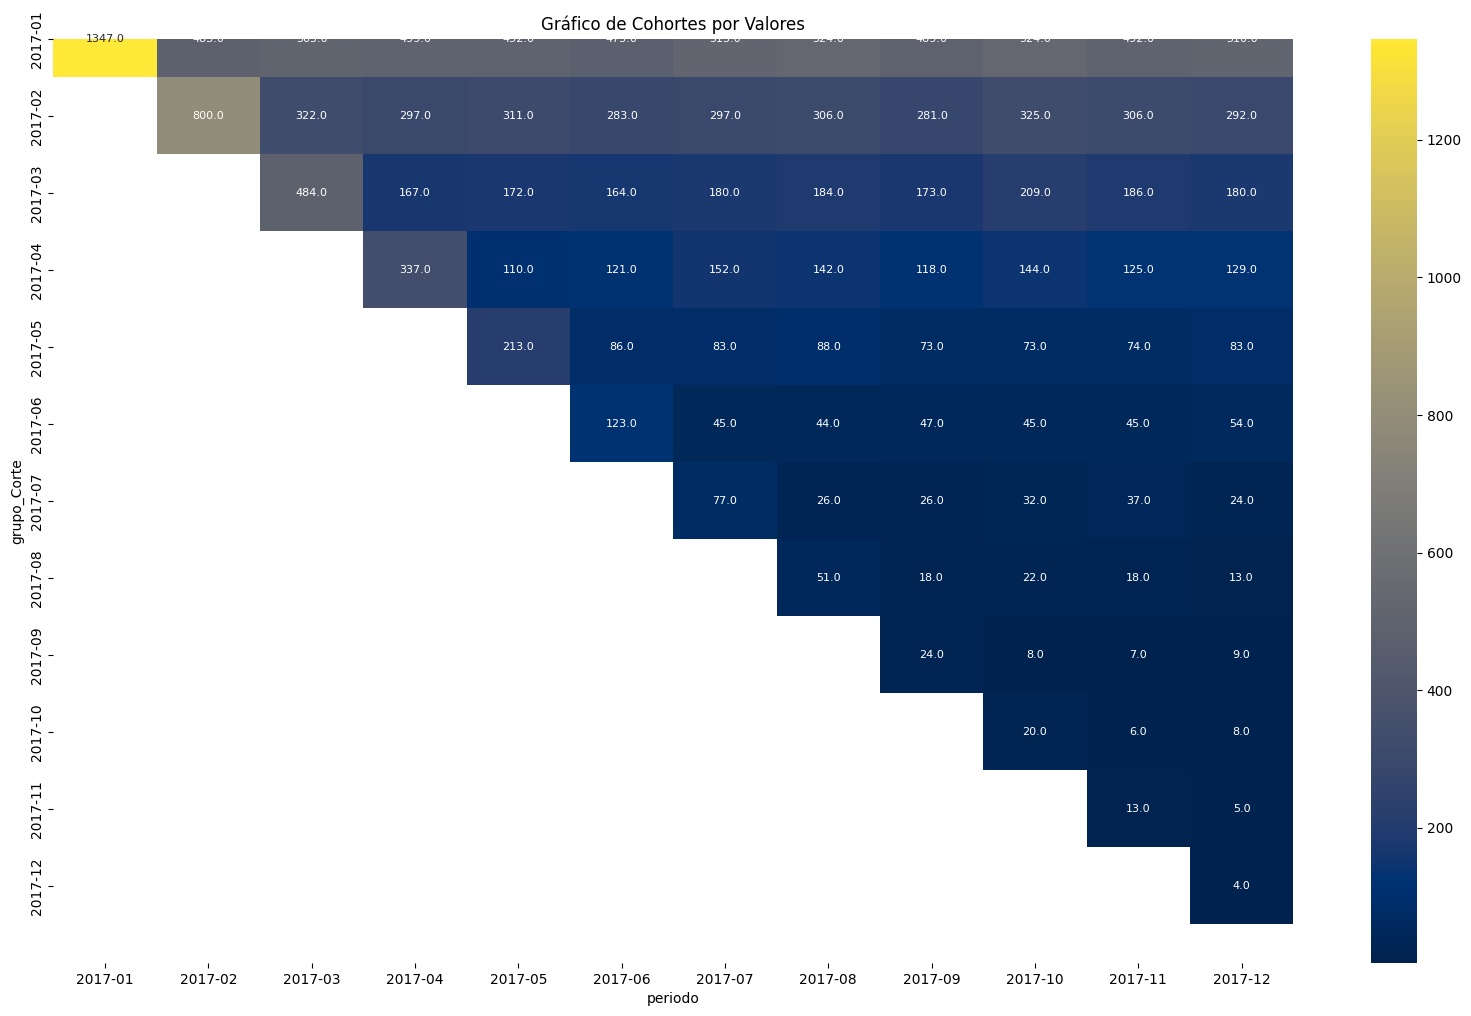

In [53]:
# Matrtiz de retecion completa
matriz_Retencion_Valores = m_retencion.T
plt.figure(figsize=(20,12)) # tamaño del grafico
plt.title("Gráfico de Cohortes por Valores")
sns.heatmap(data= matriz_Retencion_Valores,
            annot=True,
            fmt="", # lo pasa de decimales.
            annot_kws={'size':8}, # tamaño de letra
            cbar=True,
            cmap='cividis'
            )

b,t = plt.ylim() # Descibre lops valores de botton y top
b += 0.5 # le suma a la parte inferior.
t += 0.5 # le suma a la parte superior.
plt.ylim(b,t)
plt.show()

<Axes: xlabel='transaction_date'>

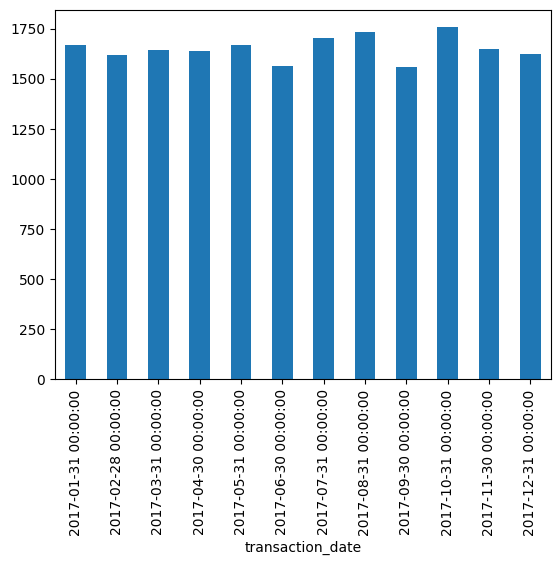

In [57]:
Compras = df2.set_index("transaction_date").transaction_id.resample("1M").count()
Compras.plot(kind="bar")
